First few rows of the dataset:
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...

Data types of columns:
age             object
Age in years    object
dtype: object

Column names in the dataset:
Index(['age', 'Age in years'], dtype='object')

Missing Values:
age             0
Age in years    0
dtype: int64
No numerical columns available for histogram.
No numerical columns available for boxplot.


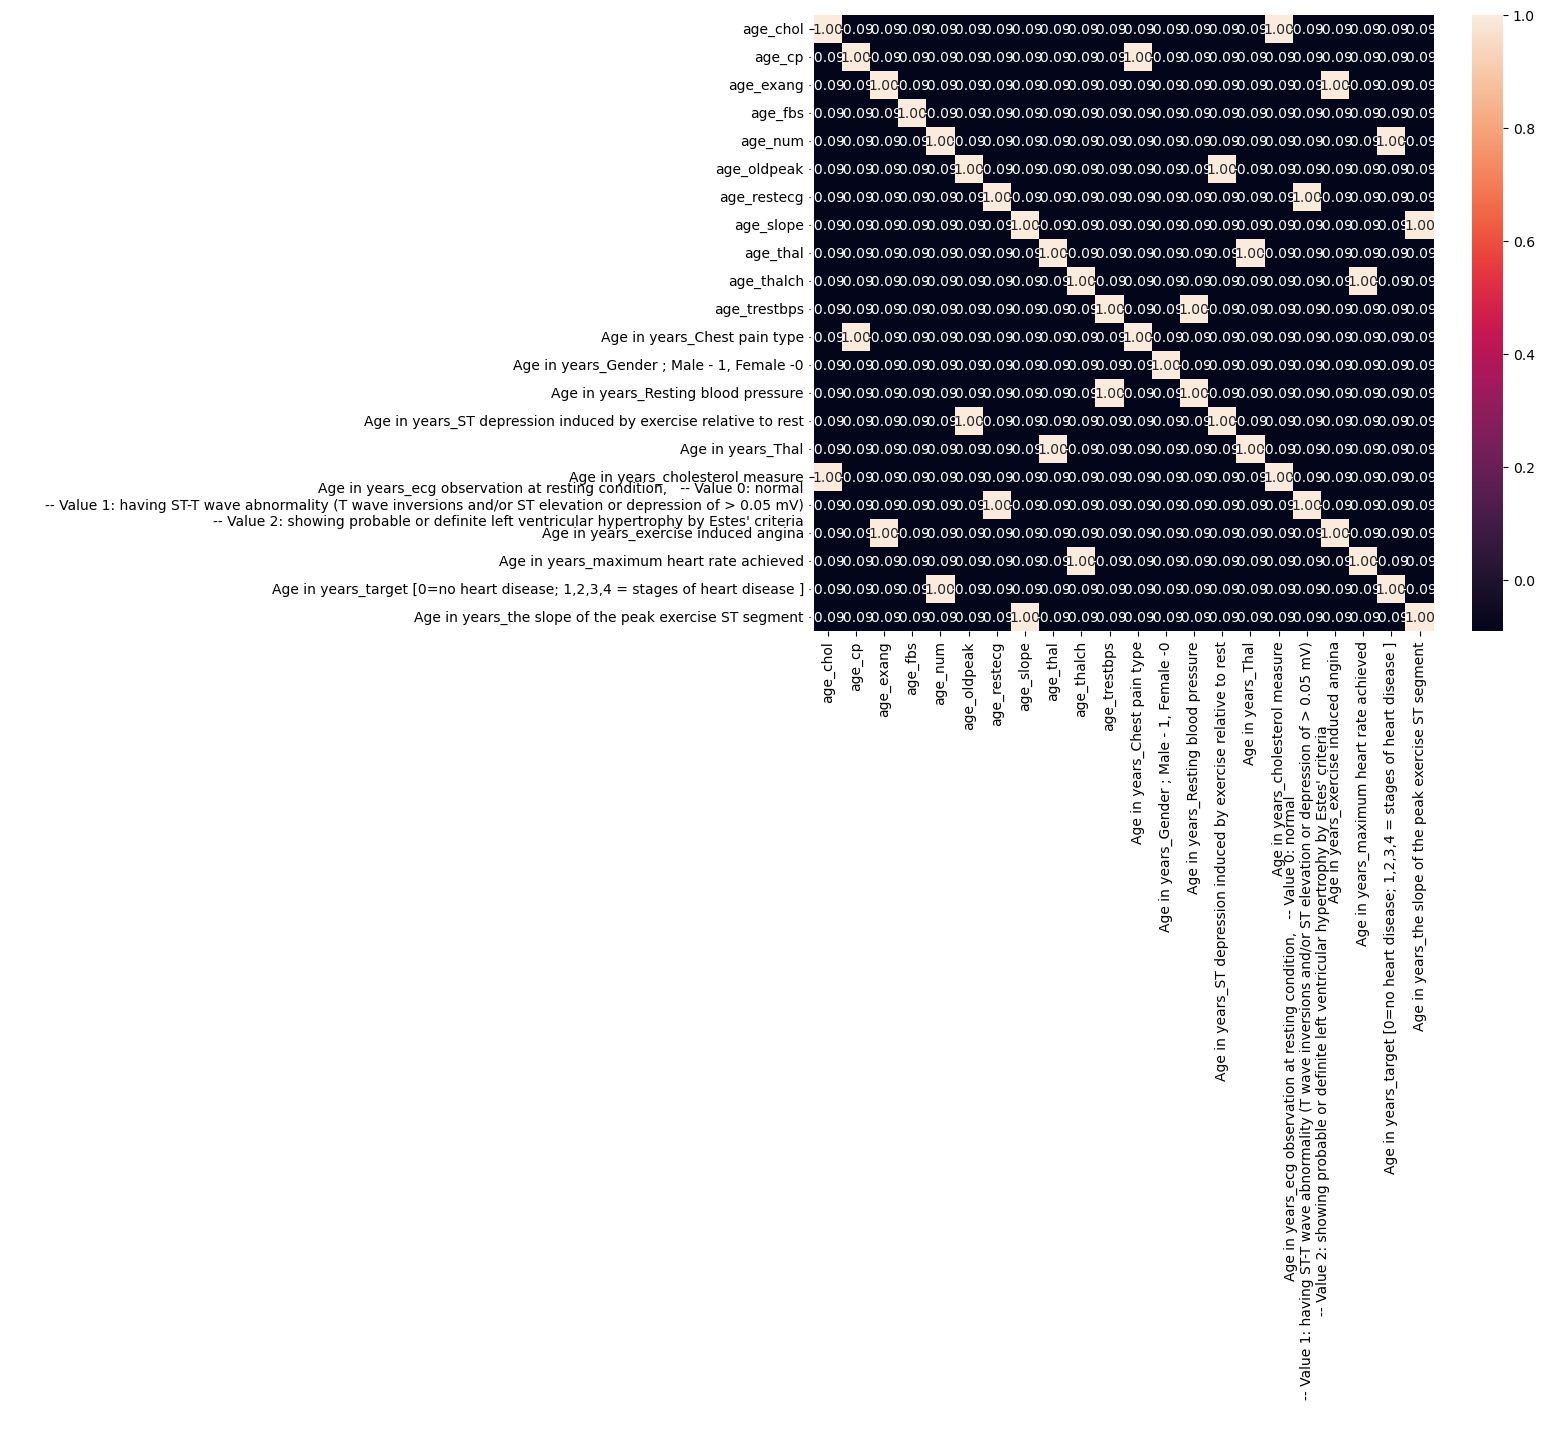

Some columns in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num'] are missing in the dataset.
'num' column not found in the dataset. Please check the column names.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Data Preparation
file_path = r'C:\Users\User\Downloads\Decision Tree\Decision Tree\heart_disease.xlsx'
try:
    dataset = pd.read_excel(file_path)
except FileNotFoundError:
    print("File not found. Please check the file path.")
    raise

# Strip any leading/trailing spaces in column names
dataset.columns = dataset.columns.str.strip()

# Verify column names
print("First few rows of the dataset:")
print(dataset.head())
print("\nData types of columns:")
print(dataset.dtypes)  # Check data types of columns
print("\nColumn names in the dataset:")
print(dataset.columns)  # Check column names

# 2. Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

# Visualize feature distributions
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
if len(numerical_cols) > 0:
    dataset[numerical_cols].hist(bins=30, figsize=(10, 7))
    plt.show()
else:
    print("No numerical columns available for histogram.")

# Box plot to identify outliers
if len(numerical_cols) > 0:
    sns.boxplot(data=dataset[numerical_cols])
    plt.show()
else:
    print("No numerical columns available for boxplot.")

# Ensure categorical variables are encoded before calculating correlations
dataset = pd.get_dummies(dataset, drop_first=True)

# Correlation matrix with numeric_only=True to avoid errors
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr(numeric_only=True)
if not correlation_matrix.empty:
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.show()
else:
    print("Correlation matrix is empty.")

# 3. Feature Engineering
# Scaling numerical features after encoding categorical variables
numerical_features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal','num']  # Update this list based on actual column names
scaler = StandardScaler()

# Check if the numerical_features exist in the dataset
if all(col in dataset.columns for col in numerical_features):
    dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])
else:
    print(f"Some columns in {numerical_features} are missing in the dataset.")

# 4. Decision Tree Classification
# Verify the column 'num' exists before splitting
if 'num' not in dataset.columns:
    print("'num' column not found in the dataset. Please check the column names.")
else:
    X = dataset.drop('num', axis=1)  # Features
    y = dataset['num']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = model.predict(X_test)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 5. Hyperparameter Tuning
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("\nBest parameters found by GridSearchCV:")
    print(grid_search.best_params_)

    # 6. Model Evaluation and Analysis
    # Visualize the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(i) for i in model.classes_])
    plt.show()
